In [1]:
#Import Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import ast

#Import Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
#Filter for US Data Analyst jobs only

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [25]:
#Remove missing data

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [26]:
#Explode skills

df_DA_US_exploded = df_DA_US.explode('job_skills')

In [27]:
#Calculate counts and median salary by skill

df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)

df_DA_skills

,count,median
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [28]:
#Rename columns

df_DA_skills = df_DA_skills.rename(columns = {'count': 'skill_count', 'median': 'median_salary'})

df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [29]:
#Calculate total number of job postings from original dataframe

DA_job_count = len(df_DA_US)

In [30]:
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [31]:
#Drop infrequent skills (with skill_percent less than 5)

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


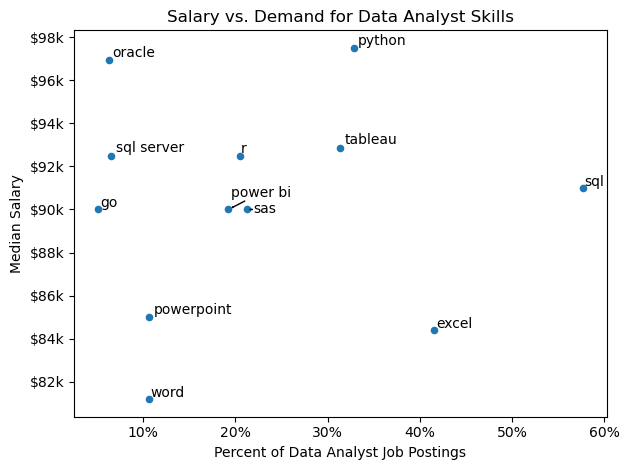

In [32]:
#Plot the data

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_DA_skills_high_demand.plot(kind = 'scatter', x = 'skill_percent', y = 'median_salary')
plt.title('Salary vs. Demand for Data Analyst Skills')
plt.xlabel('Percent of Data Analyst Job Postings')
plt.ylabel('Median Salary')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],
            df_DA_skills_high_demand['median_salary'].iloc[i],
            txt))

adjust_text(
    texts,
    arrowprops = dict(arrowstyle = '->', color = 'black', lw = 1)
    )

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y / 1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.tight_layout()
plt.show()

In [33]:
#Pull skill types from dictionaries in the original dataframe

df_technology = df['job_type_skills'].copy()

#Remove duplicates and missing values

df_technology = df_technology.drop_duplicates().dropna()

#Combine the dictionaries

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

#Remove duplicate skills within keys

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['alteryx',
  'nuix',
  'tableau',
  'power bi',
  'sas',
  'qlik',
  'sheets',
  'sap',
  'cognos',
  'powerpoint',
  'visio',
  'esquisse',
  'excel',
  'ssis',
  'powerbi',
  'outlook',
  'word',
  'ms access',
  'ssrs',
  'dax',
  'spss',
  'microstrategy',
  'looker',
  'msaccess',
  'sharepoint',
  'datarobot',
  'splunk',
  'spreadsheet'],
 'programming': ['go',
  'apl',
  'r',
  'vba',
  'typescript',
  'clojure',
  'f#',
  'c++',
  'pascal',
  'crystal',
  'fortran',
  'shell',
  'delphi',
  'sas',
  'rust',
  'c#',
  'julia',
  'visual basic',
  'bash',
  'kotlin',
  'nosql',
  'python',
  'perl',
  'sql',
  'solidity',
  'dart',
  'erlang',
  'javascript',
  'elixir',
  'php',
  'matlab',
  'ruby',
  'objective-c',
  'visualbasic',
  'swift',
  'css',
  'haskell',
  'c',
  'assembly',
  'mongodb',
  'sass',
  'ocaml',
  'vb.net',
  'no-sql',
  'java',
  'powershell',
  'mongo',
  'cobol',
  'groovy',
  'lua',
  'lisp',
  'scala',
  'golang',
  't-sql',
  'h

In [34]:
#Convert skill types to dataframe

df_tech_skills = pd.DataFrame(list(technology_dict.items()), columns = ['technology', 'skills'])

df_tech_skills = df_tech_skills.explode('skills')

df_tech_skills

,technology,skills
0,analyst_tools,alteryx
0,analyst_tools,nuix
0,analyst_tools,tableau
0,analyst_tools,power bi
0,analyst_tools,sas
...,...,...
9,sync,symphony
9,sync,slack
9,sync,twilio
9,sync,wire


In [35]:
#Merge skill types to the plot dataframe

df_plot = df_DA_skills_high_demand.merge(df_tech_skills, left_on = 'job_skills', right_on = 'skills')

df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


4 [0.55605985 0.60020583]
5 [0.75231374 0.28932115]


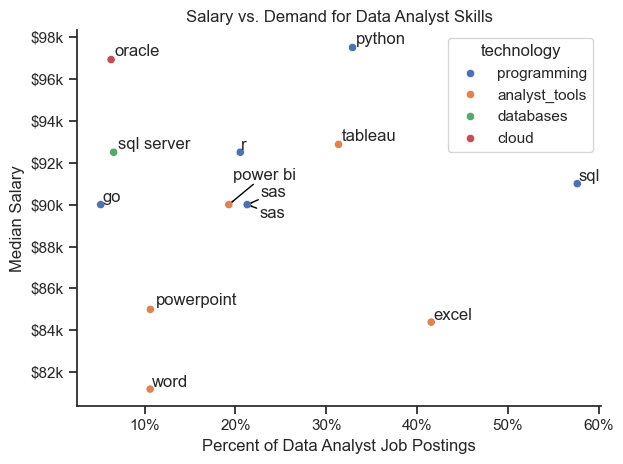

In [ ]:
#Plot the data with seaborn

sns.set_theme(style = 'ticks')
sns.scatterplot(
    data = df_plot,
    x = 'skill_percent',
    y = 'median_salary',
    hue = 'technology'
)
plt.title('Salary vs. Demand for Data Analyst Skills')
plt.xlabel('Percent of Data Analyst Job Postings')
plt.ylabel('Median Salary')
sns.despine()

texts = []
for i, txt in enumerate(df_plot['skills']):
    texts.append(plt.text(df_plot['skill_percent'].iloc[i],
            df_plot['median_salary'].iloc[i],
            txt))

adjust_text(
    texts,
    arrowprops = dict(arrowstyle = '->', color = 'black', lw = 1)
    )

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y / 1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.tight_layout()
plt.show()